In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
data.shape

(48895, 16)

So we have 16 columns and more than 48000 rows.

<Axes: >

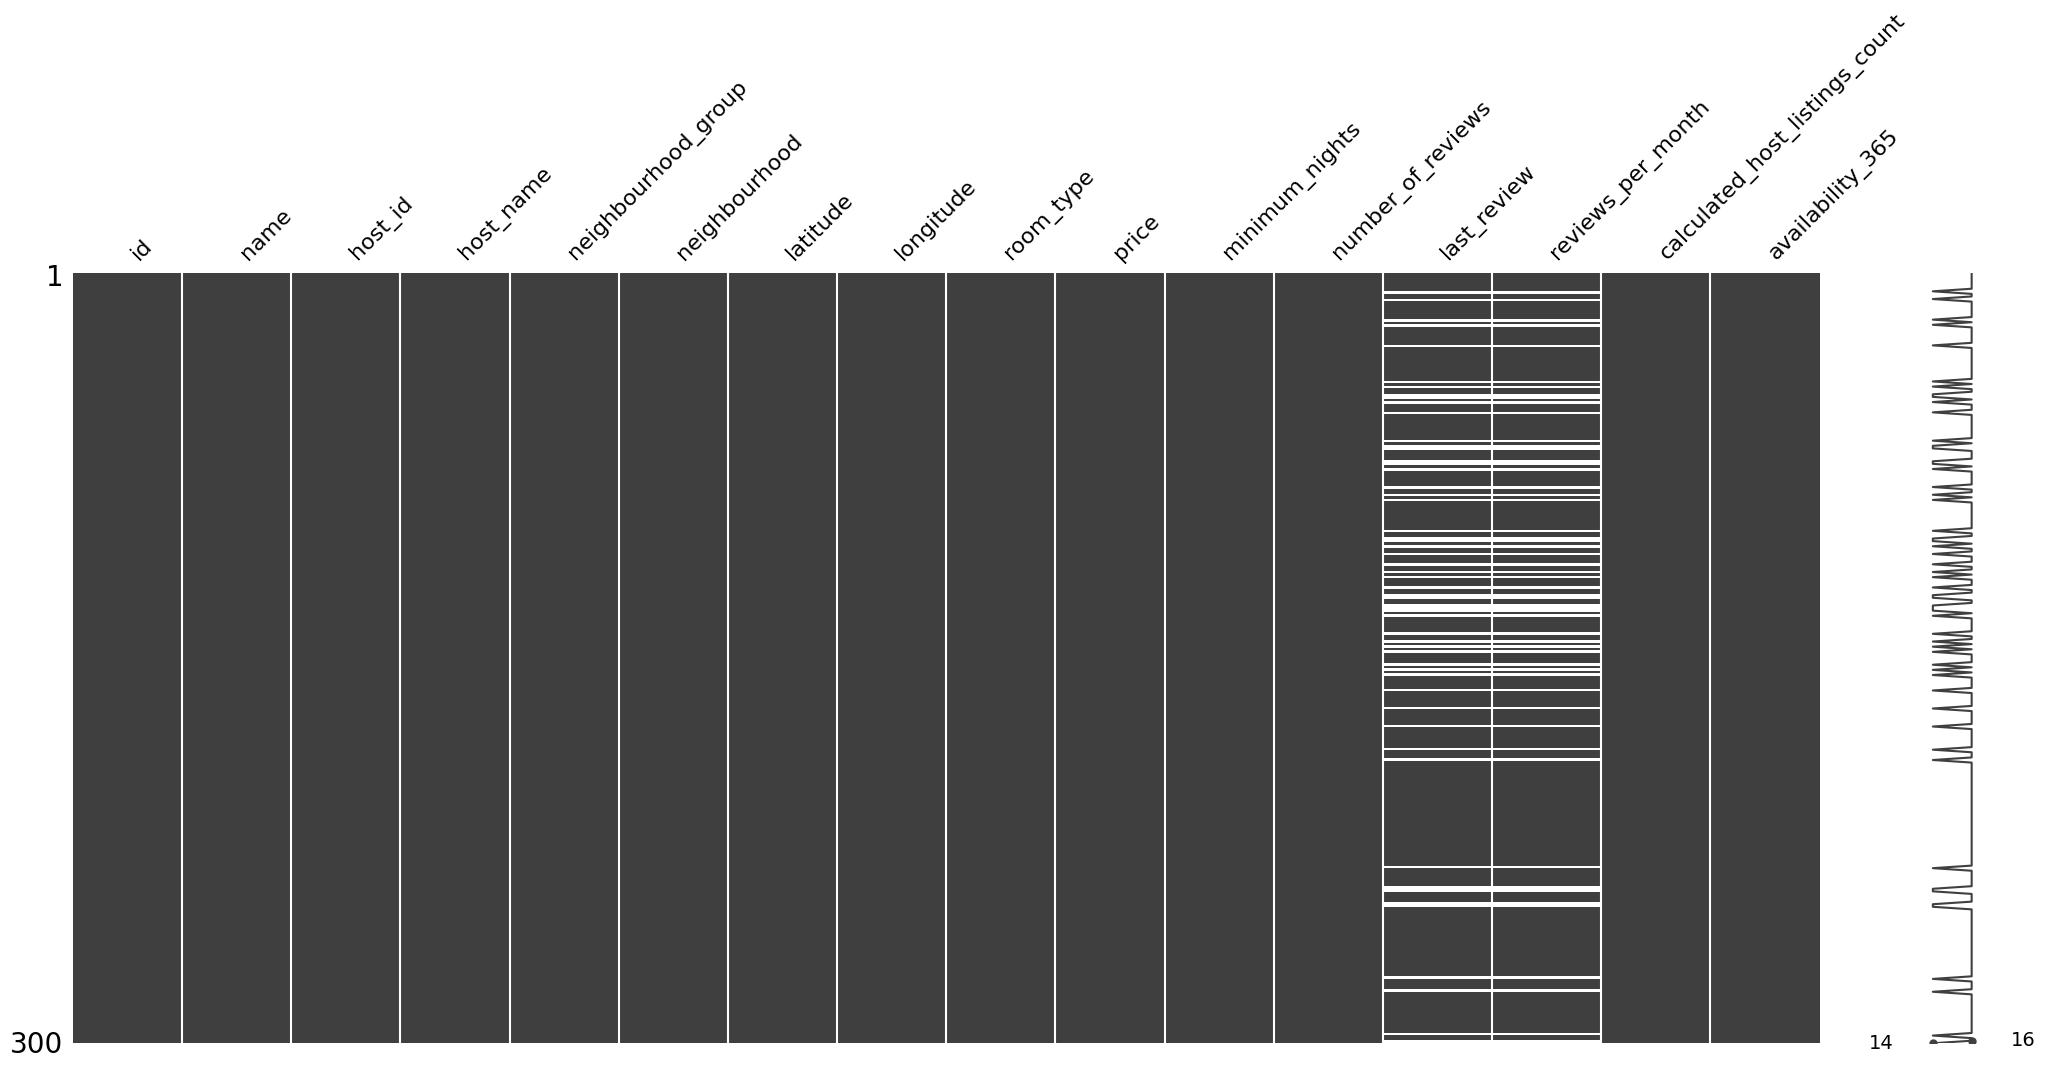

In [ ]:
msno.matrix(data.sample(300))

In [ ]:
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


There are missing values in last_review (mor than 10 000) and reviews_per_month (exactly the same number). It indicates the properties that does not have any reviews. I change both dates to 0.

Question: We remove 1/4 of our data to make the prediction. What are those? New apartments?

In [ ]:
data.loc[data.number_of_reviews == 0, 'reviews_per_month'] = 0

In [ ]:
data.loc[data.number_of_reviews == 0, 'last_review'] = 0

In [ ]:
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


I removed the data rows that does not have the host's name. But this data could be still useful for the prediction model using last_review date.

In [ ]:
data = data[pd.notnull(data['name'])]

In [ ]:
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
data = data[pd.notnull(data['host_name'])]

In [ ]:
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
data.shape

(48858, 16)

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data['room_type'].value_counts()

,count
room_type,
Entire home/apt,25393
Private room,22306
Shared room,1159


As you can see, there are very little shared rooms.

In [ ]:
data.sort_values(by=['availability_365'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
13524,10117624,Well-furnished studio w/ patio!,12190846,Kerry,Brooklyn,Williamsburg,40.72097,-73.95480,Entire home/apt,250,1,0,0,0.00,1,0
33691,26691677,Small 3rd story Room off BRKLYN-QUEENS Expressway,56616801,James,Brooklyn,Greenpoint,40.72414,-73.93967,Private room,25,1,4,2018-10-29,0.34,1,0
16271,13109326,New York City Apt. w/ Incredible View of Manha...,72874879,James,Brooklyn,Park Slope,40.67202,-73.97131,Entire home/apt,700,7,0,0,0.00,1,0
16270,13109268,One bedroom with great views of Manhattan,72874338,Augie,Brooklyn,Bushwick,40.69025,-73.90871,Private room,40,1,3,2017-01-03,0.08,1,0
16267,13108192,"Sixth Ave Chelsea, Studio Serviced Apartment",22541573,Ken,Manhattan,Chelsea,40.74480,-73.99204,Entire home/apt,205,30,2,2016-12-21,0.06,87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16061,12984506,Artsy Home in the Heart of Bushwick,52498520,Mariella,Brooklyn,Bushwick,40.68622,-73.91026,Private room,67,1,20,2017-09-17,0.53,1,365
46085,35065348,MASTER ROOM # 2 Near from JFK & LGA Airport.,214738765,Lucio,Queens,Richmond Hill,40.69440,-73.83192,Private room,75,1,5,2019-07-05,4.05,3,365
33825,26794624,Dreamer Room,201416245,Fransheska,Brooklyn,Bedford-Stuyvesant,40.68862,-73.95572,Private room,65,30,35,2019-06-19,3.06,3,365
16001,12947670,COZY BEAUTIFUL STUDIO /GREAT CENTRAL LOCATION,1475015,Mike,Manhattan,Kips Bay,40.74141,-73.97868,Entire home/apt,87,30,2,2018-10-30,0.16,52,365


Text(0.5, 1.0, 'Distribution of Availability Over 365 Days')

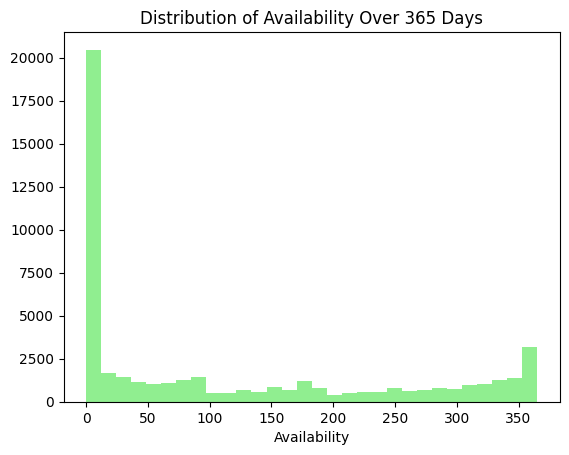

In [ ]:
plt.hist(data['availability_365'], bins=30, color = 'lightgreen')
plt.xlabel('Availability')
plt.title('Distribution of Availability Over 365 Days')

This data shows the avaiability of the apartment for the next year. There are some not available at all and some that are available in the most of the days. This shows that some appartments are more 'popular'.

In [ ]:
data.sort_values(by=['calculated_host_listings_count'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
24457,19691108,Charming Studio in Historic Brooklyn Brownstone,31582668,Marci,Brooklyn,Bedford-Stuyvesant,40.68128,-73.93202,Entire home/apt,99,3,55,2019-06-02,2.48,1,74
28001,21884557,Brooklyn Home in the Heart of it All,23005139,Samantha,Brooklyn,Crown Heights,40.67512,-73.96185,Private room,55,3,0,0,0.00,1,0
28003,21884758,The Gray Room,10979123,Anjelica,Manhattan,Hell's Kitchen,40.75480,-73.99650,Entire home/apt,170,3,26,2019-06-21,1.40,1,1
28004,21885522,Family Friendly Vibrant duplex in Windsor Terrace,17525654,Susan & Aarti,Brooklyn,Windsor Terrace,40.65537,-73.98190,Entire home/apt,160,5,0,0,0.00,1,0
28005,21885544,"Quirky, bright 1bed apartment in historic Broo...",2749343,Kaity,Brooklyn,Bedford-Stuyvesant,40.68541,-73.94692,Entire home/apt,80,5,1,2018-01-04,0.05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42031,32662408,Dashing 1BR in Midtown East by Sonder,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74422,-73.97309,Entire home/apt,174,29,0,0,0.00,327,312
42033,32663403,Sharp 1BR in Midtown East by Sonder,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74436,-73.97223,Entire home/apt,192,29,0,0,0.00,327,329
42045,32667711,Sonder | The Nash | Picturesque Studio + Gym,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74769,-73.97592,Entire home/apt,165,29,1,2019-05-19,0.59,327,342
43231,33527998,Sonder | Stock Exchange | Relaxed 1BR + Lounge,219517861,Sonder (NYC),Manhattan,Financial District,40.70747,-74.01226,Entire home/apt,247,2,9,2019-06-14,3.42,327,272


Some host have a lot of apartments but the majority have only 1.

Text(0.5, 1.0, 'Distribution of Host Listings Count')

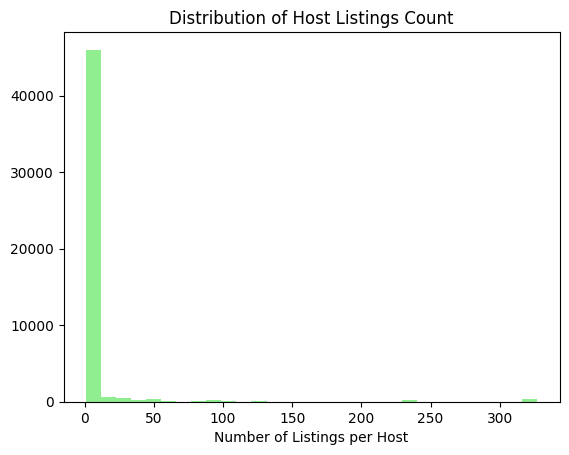

In [ ]:
plt.hist(data.calculated_host_listings_count, bins=30, color = 'lightgreen')
plt.xlabel('Number of Listings per Host')
plt.title('Distribution of Host Listings Count')

In [ ]:
data['number_of_reviews'].describe()

,number_of_reviews
count,48858.000000
mean,23.273098
std,44.549898
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


The summary of the number of reviews shows that some appartments are very 'popular' compared to others.

Text(0.5, 1.0, 'Box Plot of Number of Reviews per Listing')

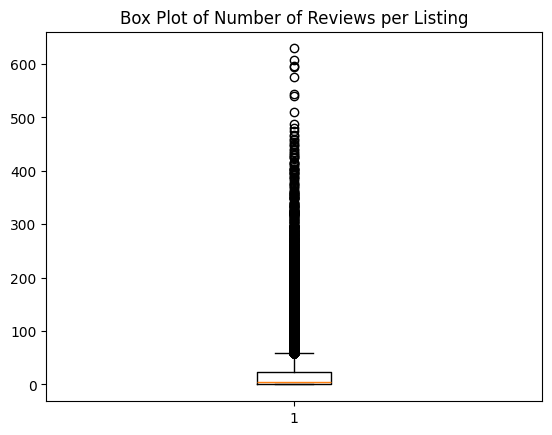

In [ ]:
plt.boxplot(data['number_of_reviews'])
plt.title('Box Plot of Number of Reviews per Listing')

In [ ]:
len(data[data.number_of_reviews > 100])

2992

In [ ]:
len(data[data.number_of_reviews > 300])

132

Do we consider it as outliers? I think this appartments are more 'popular' or there are some other things affecting this outcome.

In [ ]:
len(data[data.number_of_reviews > 500])

8

In [ ]:
data.sort_values(by=['minimum_nights'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
37549,29794270,Barrett’s Family Home,120245209,Heidi,Brooklyn,Canarsie,40.63535,-73.89493,Private room,55,1,7,2019-06-22,1.08,2,126
14343,11178582,Charming bedroom downtown,6980995,Dominik,Manhattan,Chinatown,40.71312,-73.99669,Private room,90,1,5,2017-05-19,0.12,5,0
37544,29791183,Nice room in Astoria 20min to Manhattan,1172202,Funda,Queens,Ditmars Steinway,40.76984,-73.90779,Private room,45,1,7,2019-06-22,2.50,5,29
37542,29787085,Half block to NY. Flushing Chinatown. Main Street,110058188,Charles,Queens,Flushing,40.76016,-73.82672,Private room,57,1,13,2019-07-06,3.28,1,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,0,0.00,1,331
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0,0.00,1,365
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42


The tables clearly shows that the number of minimum nights starts by 1 and end at 1250, which could be outlier.

Text(0.5, 1.0, 'Distribution of Minimum Nights per Listing')

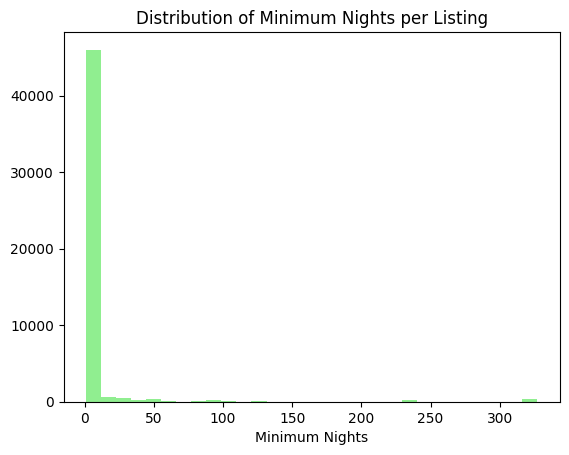

In [ ]:
plt.hist(data.calculated_host_listings_count, bins=30, color = 'lightgreen')
plt.xlabel('Minimum Nights')
plt.title('Distribution of Minimum Nights per Listing')

In [ ]:
len(data[data.minimum_nights > 300])

49

In [ ]:
len(data[data.minimum_nights > 200])

68

do we consider it as outlier? There are only 49 apartments that require more than 300 minimum nights. I suggest that this are outliers.

In [ ]:
len(data[data.minimum_nights > 100])

173

In [ ]:
data.shape

(48858, 16)

In [ ]:
data.sort_values(by=['longitude'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
45652,34888503,Charming town of Tottenville right outside NYC,962249,Dora,Staten Island,Tottenville,40.50943,-74.24442,Entire home/apt,70,3,1,2019-07-01,1.00,1,128
15278,12230928,Villa DiGioia visit NYC via SI,65806798,Michael J,Staten Island,Tottenville,40.50708,-74.24285,Private room,100,2,0,0,0.00,1,365
14119,10830083,Beautiful well kept private home!,56078939,Tony,Staten Island,Tottenville,40.49979,-74.24084,Private room,110,2,0,0,0.00,1,364
1424,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Staten Island,Tottenville,40.50868,-74.23986,Entire home/apt,299,3,59,2019-07-08,0.82,1,245
23460,18997371,Cozy Getaway,90104417,Sueann,Staten Island,Tottenville,40.50873,-74.23914,Entire home/apt,85,2,49,2019-07-01,2.08,2,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38562,30325639,Cozy shared studio in a safe neighborhood,21495656,Ramy,Queens,Little Neck,40.76212,-73.71928,Shared room,32,3,1,2018-12-04,0.14,1,88
45592,34844239,❀ Bright and cozy townhouse | Ideal for famili...,154268909,Malik,Queens,Bellerose,40.74027,-73.71829,Entire home/apt,180,2,0,0,0.00,2,281
11610,9031216,"upstairs apartment private, spacious",47140247,Hilary,Queens,Bellerose,40.72756,-73.71795,Entire home/apt,42,3,0,0,0.00,1,0
47208,35638944,☀Bright & sunny townhouse | Perfect for famili...,154268909,Malik,Queens,Bellerose,40.74006,-73.71690,Entire home/apt,240,2,0,0,0.00,2,159


In [ ]:
data.sort_values(by=['latitude'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14119,10830083,Beautiful well kept private home!,56078939,Tony,Staten Island,Tottenville,40.49979,-74.24084,Private room,110,2,0,0,0.00,1,364
46919,35489384,Cozy Apartment,236186921,Iveth,Staten Island,Tottenville,40.50641,-74.23059,Entire home/apt,75,1,1,2019-06-28,1.00,1,299
15278,12230928,Villa DiGioia visit NYC via SI,65806798,Michael J,Staten Island,Tottenville,40.50708,-74.24285,Private room,100,2,0,0,0.00,1,365
1424,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Staten Island,Tottenville,40.50868,-74.23986,Entire home/apt,299,3,59,2019-07-08,0.82,1,245
23460,18997371,Cozy Getaway,90104417,Sueann,Staten Island,Tottenville,40.50873,-74.23914,Entire home/apt,85,2,49,2019-07-01,2.08,2,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,2008227,Private Studio in Private Home,9539641,Dianne,Bronx,North Riverdale,40.90804,-73.90005,Private room,53,2,143,2019-06-30,2.13,1,263
48033,36041232,Nice house room 2 near van cortlandt park,230720704,Pp,Bronx,North Riverdale,40.91167,-73.89566,Private room,40,1,1,2019-07-06,1.00,3,174
23011,18635370,Fantastic Sunny peaceful room in Riverdale,91385196,Vicdania,Bronx,North Riverdale,40.91169,-73.90564,Private room,50,365,0,0,0.00,1,363
47790,35916310,Nice house private room,230720704,Pp,Bronx,North Riverdale,40.91234,-73.89417,Private room,40,1,1,2019-06-30,1.00,3,179


In [ ]:
data.sort_values(by=['price'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0,0.00,1,83


In [ ]:
data['price'].describe()

,price
count,48858.000000
mean,152.740309
std,240.232386
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Text(0.5, 1.0, 'Distribution of Listing Prices')

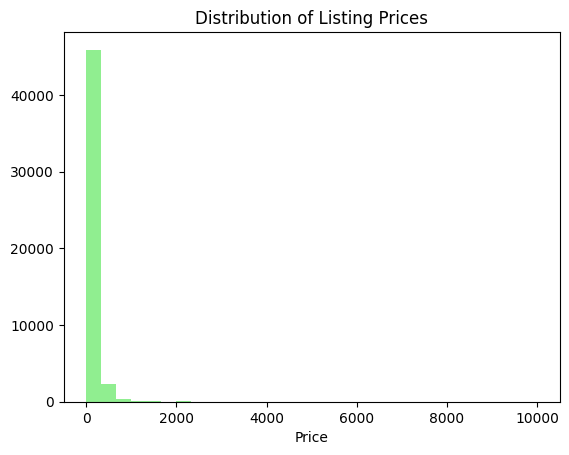

In [ ]:
plt.hist(data['price'], bins=30, color='lightgreen')
plt.xlabel('Price')
plt.title('Distribution of Listing Prices')

In [ ]:
len(data[data.price > 3000])

45

In [ ]:
len(data[data.price > 2000])

86

outliers? Which one are outliers.

what does price '0' mean? I think this data should be removed. There ared only 11 apartments with price = 0.

In [ ]:
(data['price'] == 0).sum()

11

In [ ]:
(data['price'] > 0).sum()

48847

:D